<a href="https://colab.research.google.com/github/MarianOspina/BasededatosDise-o/blob/main/Transfer_Learning_Emociones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf /content/datas/llorando.zip
!rm -rf /content/data/estresados.zip


In [ ]:
!unzip /contect/data/estresado

In [4]:
!ls -la

total 39732
drwxr-xr-x 1 root root     4096 May 21 16:25 .
drwxr-xr-x 1 root root     4096 May 21 16:15 ..
drwxr-xr-x 4 root root     4096 May 17 13:36 .config
-rw-r--r-- 1 root root 33125830 May 21 16:26 estresados.zip
-rw-r--r-- 1 root root  7540467 May 21 16:25 llorando.zip
drwxr-xr-x 1 root root     4096 May 17 13:37 sample_data


In [7]:
!chmod 444 sample_data

In [8]:
!ls -l

total 39720
-rw-r--r-- 1 root root 33125830 May 21 16:26 estresados.zip
-rw-r--r-- 1 root root  7540467 May 21 16:25 llorando.zip
dr--r--r-- 1 root root     4096 May 17 13:37 sample_data


In [14]:
!unzip /content/llorando.zip -d /content/dataset/

Archive:  /content/llorando.zip
   creating: /content/dataset/llorando/
  inflating: /content/dataset/__MACOSX/._llorando  
  inflating: /content/dataset/llorando/images32.jpg  
  inflating: /content/dataset/__MACOSX/llorando/._images32.jpg  
  inflating: /content/dataset/llorando/image22.jpeg  
  inflating: /content/dataset/__MACOSX/llorando/._image22.jpeg  
  inflating: /content/dataset/llorando/images123.jpg  
  inflating: /content/dataset/__MACOSX/llorando/._images123.jpg  
  inflating: /content/dataset/llorando/ee9f2e51bafa08e6572c9234d03550be.jpg  
  inflating: /content/dataset/__MACOSX/llorando/._ee9f2e51bafa08e6572c9234d03550be.jpg  
  inflating: /content/dataset/llorando/640px-Tears_.jpg  
  inflating: /content/dataset/__MACOSX/llorando/._640px-Tears_.jpg  
  inflating: /content/dataset/llorando/images136.jpg  
  inflating: /content/dataset/__MACOSX/llorando/._images136.jpg  
  inflating: /content/dataset/llorando/pngtree-man-with-tears-and-tears-on-his-face-picture-image_3385

In [15]:
!unzip /content/estresados.zip -d /content/dataset/

Archive:  /content/estresados.zip
   creating: /content/dataset/estresados/
  inflating: /content/dataset/__MACOSX/._estresados  
  inflating: /content/dataset/estresados/-que-se-sienta-con-la-computadora-portC3A1til-y-la-cabeza-conmovedora-con-la.jpg  
  inflating: /content/dataset/__MACOSX/estresados/._-que-se-sienta-con-la-computadora-portC3A1til-y-la-cabeza-conmovedora-con-la.jpg  
  inflating: /content/dataset/estresados/sad_woman_in_windowsill.jpg  
  inflating: /content/dataset/__MACOSX/estresados/._sad_woman_in_windowsill.jpg  
  inflating: /content/dataset/estresados/image22.jpeg  
  inflating: /content/dataset/__MACOSX/estresados/._image22.jpeg  
  inflating: /content/dataset/estresados/collage-con-fotos-de-personas-estresadas-en-fondos-de-color-2n6r3mk.jpg  
  inflating: /content/dataset/__MACOSX/estresados/._collage-con-fotos-de-personas-estresadas-en-fondos-de-color-2n6r3mk.jpg  
  inflating: /content/dataset/estresados/estres-laboral-daC3B1o-salud-empresa-estudio-oms.jpg 

In [16]:
!ls /content/dataset/llorando | wc -l #475
!ls /content/dataset/estresados | wc -l #515


185
143


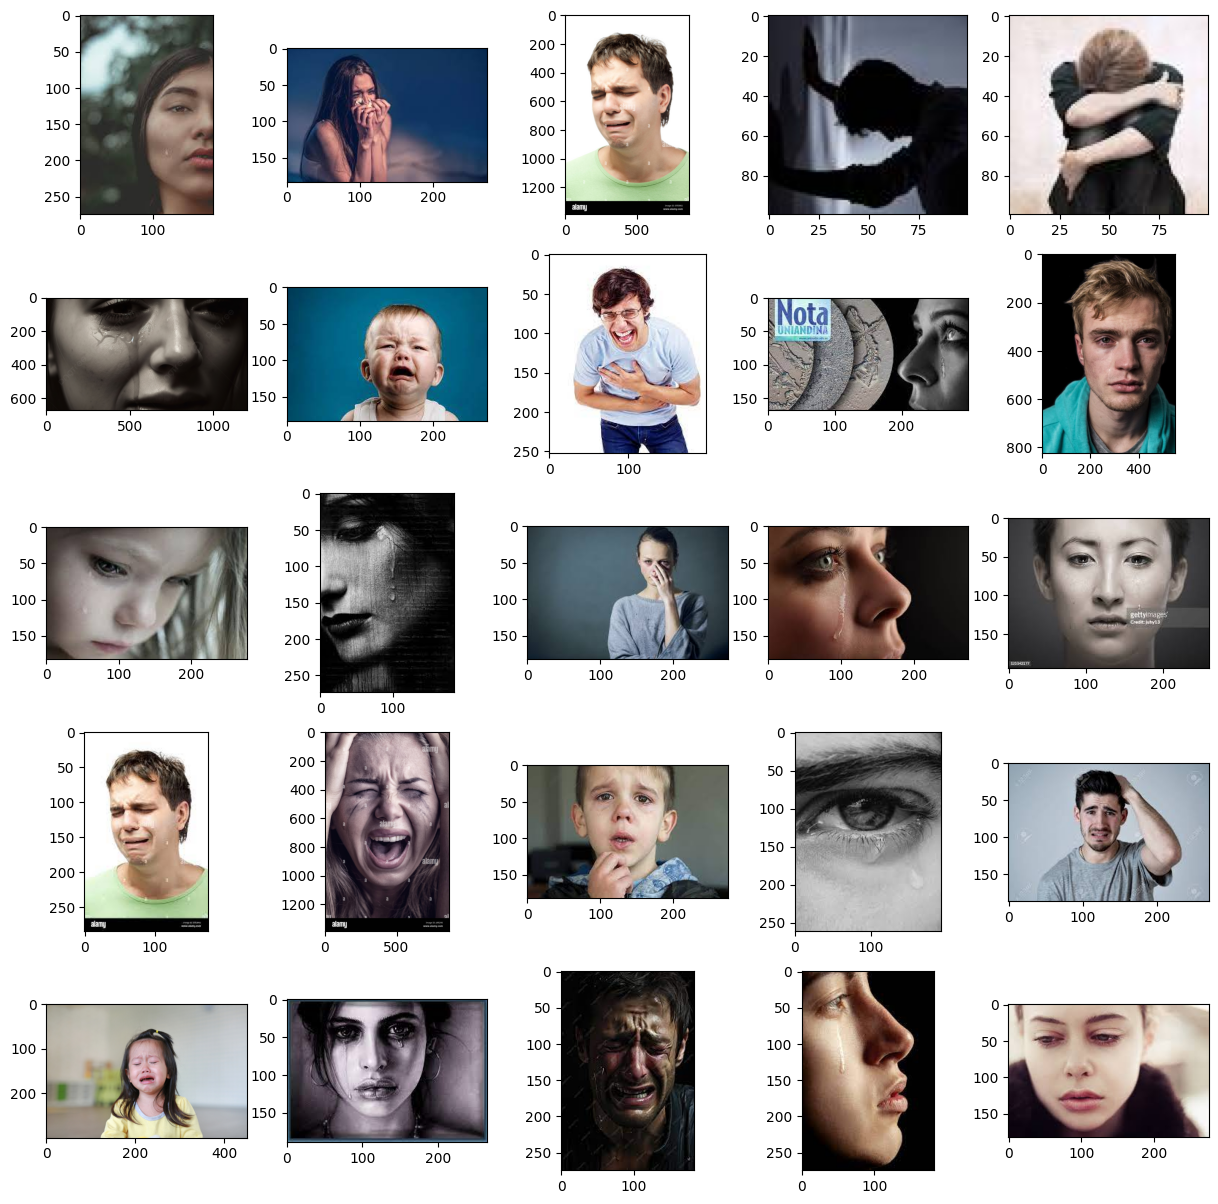

In [75]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/dataset/llorando'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

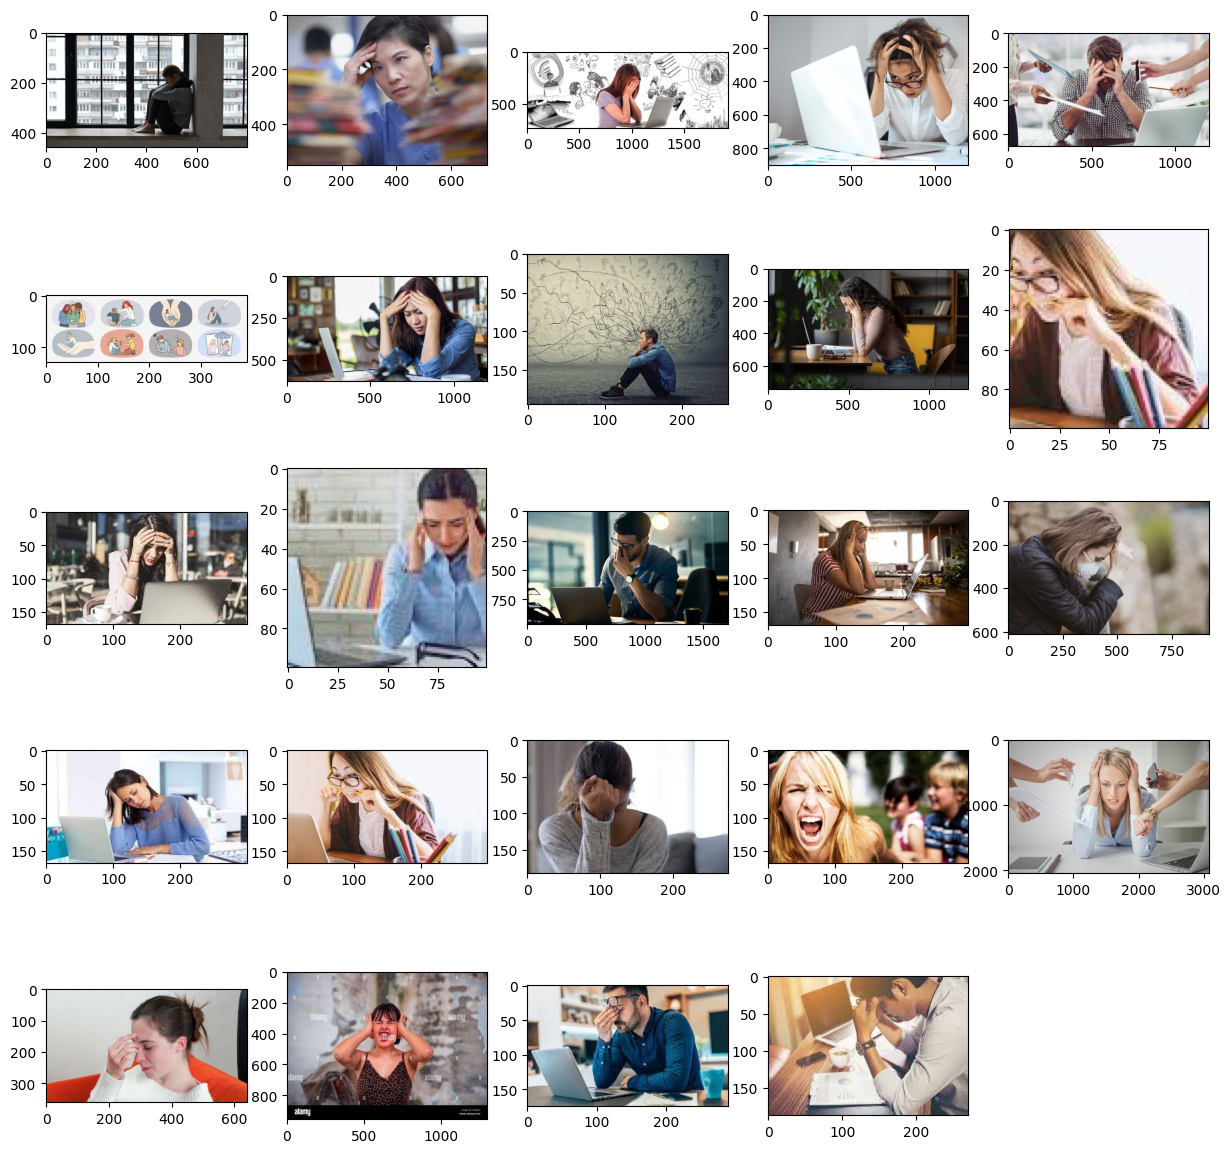

In [76]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/dataset/estresados'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  if os.path.isfile(carpeta + '/' + nombreimg) and os.path.splitext(nombreimg)[1].lower() in ['.jpg', '.png', '.jpeg', '.gif']:
    imagen = mpimg.imread(carpeta + '/' + nombreimg)
    plt.subplot(5,5,i+1)
    plt.imshow(imagen)

In [20]:
!mkdir dataset_limpio

In [21]:
!mkdir dataset_limpio/llorando

In [ ]:
!mkdir dataset_limpio/estresado

In [25]:
import shutil

In [77]:
carpeta_fuente = '/content/dataset/llorando'
carpeta_destino = '/content/dataset_limpio/llorando'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i <= 100:
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [78]:
carpeta_fuente = '/content/dataset/estresados'
carpeta_destino = '/content/dataset_limpio/estresado'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i <= 100:
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [79]:
!ls /content/dataset_limpio/llorando | wc -l
!ls /content/dataset_limpio/estresado | wc -l


100
100


In [ ]:
!ls -la /content/dataset_limpio/

In [ ]:
!rm /content/dataset_limpio/.ipynb_checkpoints/ -r

Found 159 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


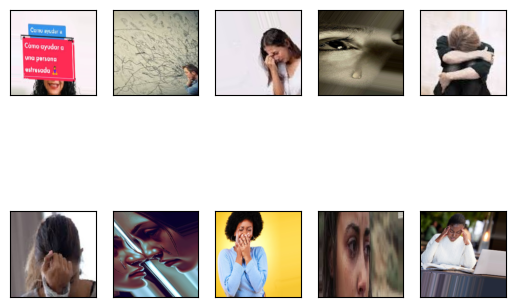

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2
)

data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset_limpio', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset_limpio', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


In [86]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [87]:
mobilenetv2.trainable = False

In [88]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2, activation='softmax')
])

In [89]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [90]:
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [91]:
EPOCAS = 11

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/11
5/5 [==============================] - 10s 1s/step - loss: 0.6447 - accuracy: 0.6730 - val_loss: 0.5303 - val_accuracy: 0.7436
Epoch 2/11
5/5 [==============================] - 5s 1s/step - loss: 0.4628 - accuracy: 0.7862 - val_loss: 0.4004 - val_accuracy: 0.8205
Epoch 3/11
5/5 [==============================] - 4s 706ms/step - loss: 0.4262 - accuracy: 0.8176 - val_loss: 0.3238 - val_accuracy: 0.8718
Epoch 4/11
5/5 [==============================] - 3s 695ms/step - loss: 0.3508 - accuracy: 0.8176 - val_loss: 0.2921 - val_accuracy: 0.8205
Epoch 5/11
5/5 [==============================] - 4s 822ms/step - loss: 0.3302 - accuracy: 0.8868 - val_loss: 0.3027 - val_accuracy: 0.8462
Epoch 6/11
5/5 [==============================] - 3s 755ms/step - loss: 0.3035 - accuracy: 0.8616 - val_loss: 0.2368 - val_accuracy: 0.9231
Epoch 7/11
5/5 [==============================] - 4s 986ms/step - loss: 0.3450 - accuracy: 0.8302 - val_loss: 0.2134 - val_accuracy: 0.9231
Epoch 8/11
5/5 [=========

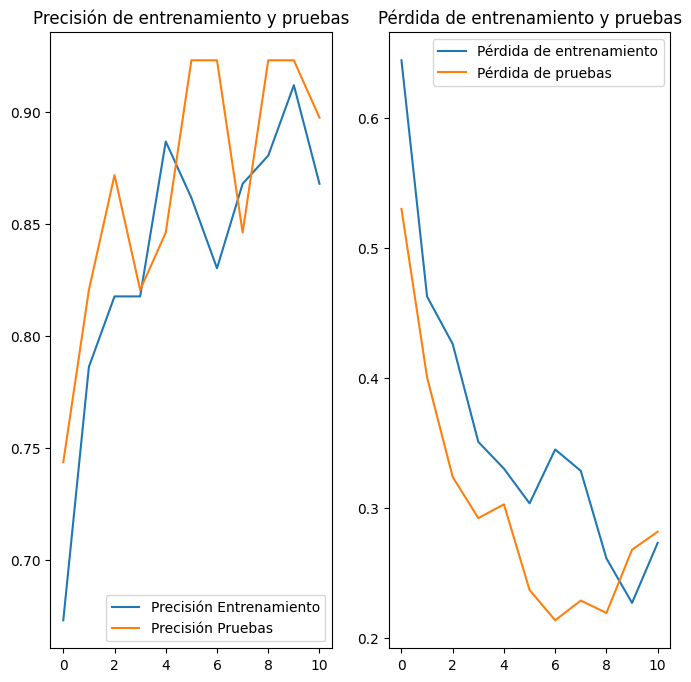

In [93]:
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(11)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [73]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1), prediccion


In [94]:
url = 'https://fotografias.larazon.es/clipping/cmsimages01/2021/11/10/3C522423-42C7-43F1-9D45-E9A7B5C5C40A/98.jpg?crop=629,354,x0,y161&width=1900&height=1069&optimize=low&format=webply'
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 1s 1s/step
(1, array([[0.0151499 , 0.98485005]], dtype=float32))


In [95]:
modelo.save('mm/modelo_entrenado.h5')

In [97]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import load_model

In [98]:
with tf.keras.utils.custom_object_scope({'KerasLayer': hub.KerasLayer}):
    modelo_cargado = load_model('mm/modelo_entrenado.h5')